In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')



import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/base.csv')
df.head(50)

Authors  \
0      Han Z.; Wei B.; Xi X.; Chen B.; Yin Y.; Li S.   
1                      Jiao W.; Zhang X.; D'Souza F.   
2  Richardson J.P.; Smith C.; Curtis S.; Watson S...   
3                Lasko T.A.; Strobl E.V.; Stead W.W.   
4  Hameed B.M.Z.; Naik N.; Ibrahim S.; Tatkar N.S...   
5                               Russell S.; Kumar A.   
6  Richardson J.P.; Curtis S.; Smith C.; Pacyna J...   
7  Aggarwal K.; Mijwil M.M.; Sonia; Al-Mistarehi ...   
8                             Li M.; Xiong X.; Xu B.   
9  Lin Y.; Li Y.; Lu K.; Ma C.; Zhao P.; Gao D.; ...   

                                   Author full names  \
0  Han, Zhongyi (57194624171); Wei, Benzheng (259...   
1  Jiao, Weiqi (58339107900); Zhang, Xuan (587020...   
2  Richardson, Jordan P. (57216132347); Smith, Ca...   
3  Lasko, Thomas A. (6507484673); Strobl, Eric V....   
4  Hameed, BM Zeeshan (57213811630); Naik, Nithes...   
5  Russell, Stephen (57190403263); Kumar, Ashwin ...   
6  Richardson, Jordan P. (57216132347); Curtis, S...   
7  Aggarwal, Karan (57171775600); Mijwil, Maad M....   
8  Li, Ming (59329501800); Xiong, Xiaomin (572110...   
9  Lin, Yucong (57212110354); Li, Yang (572216247...   

                                        Author(s) ID  \
0  57194624171; 25925572100; 55034799700; 5721519...   
1              58339107900; 58702064000; 58537553700   
2  57216132347; 55514696700; 57216894211; 5721347...   
3                6507484673; 57205091692; 7102435401   
4  57213811630; 57205319450; 57221684980; 5807695...   
5                           57190403263; 57941363600   
6  57216132347; 57216894211; 55514696700; 5614859...   
7  57171775600; 57211750385; 57213078881; 5721480...   
8              59329501800; 57211029730; 56670604200   
9  57212110354; 57221624772; 57215835816; 5721210...   

                                               Title  Year  \
0  Unifying neural learning and symbolic reasonin...  2021   
1  The Economic Value and Clinical Impact of Arti...  2023   
2  Patient apprehensions about the use of artific...  2021   
3  Why do probabilistic clinical models fail to t...  2024   
4  Breaking Barriers: Unveiling Factors Influenci...  2023   
5  Providing Care: Intrinsic Human–Machine Teams ...  2022   
6  A framework for examining patient attitudes re...  2022   
7  Has the Future Started? The Current Growth of ...  2022   
8  Attitudes and perceptions of Chinese oncologis...  2024   
9  Long-distance disorder-disorder relation extra...  2020   

                                        Source title  \
0                             Medical Image Analysis   
1                                        IEEE Access   
2                               npj Digital Medicine   
3                               npj Digital Medicine   
4                   Big Data and Cognitive Computing   
5                                            Entropy   
6                                     Digital Health   
7  Iraqi Journal for Computer Science and Mathema...   
8                        Frontiers in Digital Health   
9                  Journal of Biomedical Informatics   

                                                Link  \
0  https://www.scopus.com/inward/record.uri?eid=2...   
1  https://www.scopus.com/inward/record.uri?eid=2...   
2  https://www.scopus.com/inward/record.uri?eid=2...   
3  https://www.scopus.com/inward/record.uri?eid=2...   
4  https://www.scopus.com/inward/record.uri?eid=2...   
5  https://www.scopus.com/inward/record.uri?eid=2...   
6  https://www.scopus.com/inward/record.uri?eid=2...   
7  https://www.scopus.com/inward/record.uri?eid=2...   
8  https://www.scopus.com/inward/record.uri?eid=2...   
9  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  Automated medical report generation in spine r...   
1  Artificial Intelligence (AI)-supported healthc...   
2  While there is significant enthusiasm in the m...   
3  The rising popularity of artificial intelligen... 

**ANALISIS KEYWORDS**

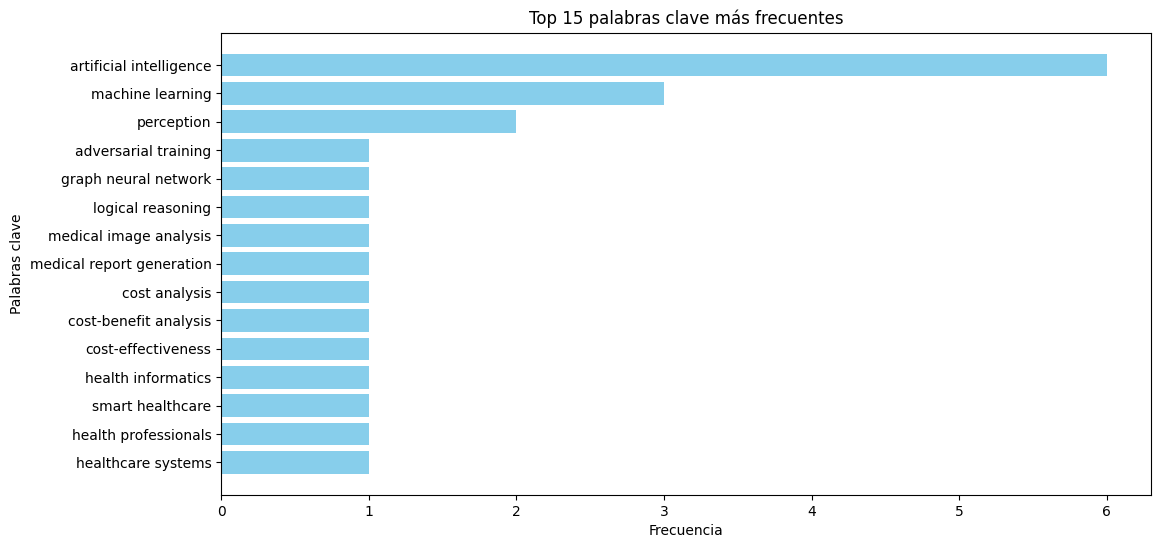

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import pandas as pd

# Asegurar que no haya valores nulos en 'Author Keywords'
df['Author Keywords'] = df['Author Keywords'].fillna('')

# Dividir las palabras clave y contar su frecuencia
all_keywords = [kw.strip().lower() for keywords in df['Author Keywords'] for kw in keywords.split(';') if kw.strip()]
keyword_counts = Counter(all_keywords)

# Obtener las 15 palabras clave más comunes
top_keywords = keyword_counts.most_common(15)
keywords, counts = zip(*top_keywords)

# Graficar
plt.figure(figsize=(12, 6))
plt.barh(keywords, counts, color='skyblue')
plt.xlabel("Frecuencia")
plt.ylabel("Palabras clave")
plt.title("Top 15 palabras clave más frecuentes")
plt.gca().invert_yaxis()  # Para que la más frecuente esté arriba
plt.show()


**WORD CLOUD**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


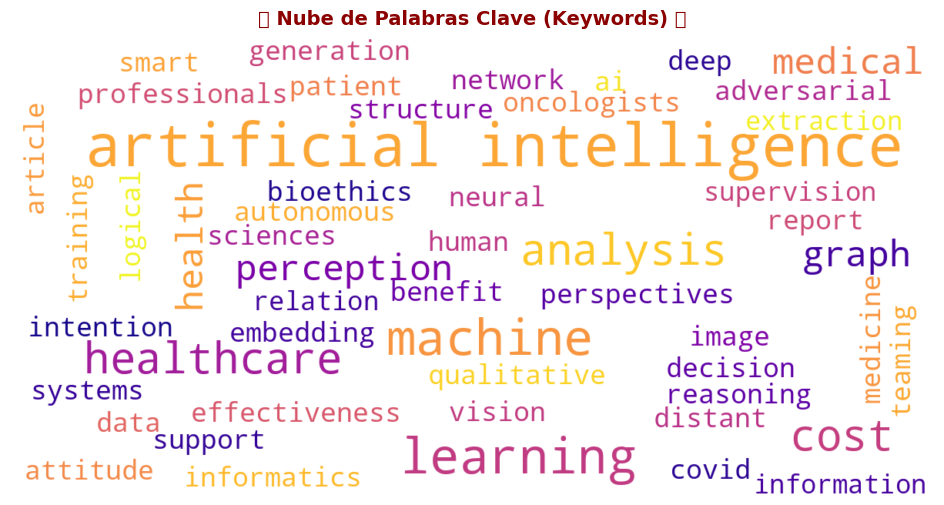

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todas las keywords en un solo string
keywords_text = ' '.join(all_keywords)

# Configurar la nube de palabras con diseño atractivo
wordcloud = WordCloud(
    width=1200, height=600,
    background_color='white',
    colormap='plasma',  # Mejores colores (más vibrantes)
    max_words=300,  # Más palabras para un mejor efecto
    contour_color='black',
    contour_width=2,
    prefer_horizontal=0.9  # Prioriza palabras horizontales
).generate(keywords_text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🌟 Nube de Palabras Clave (Keywords) 🌟", fontsize=14, fontweight='bold', color='darkred')
plt.show()


**FUENTES CON MAS ARTICULOS EN EL DATAFRAME**

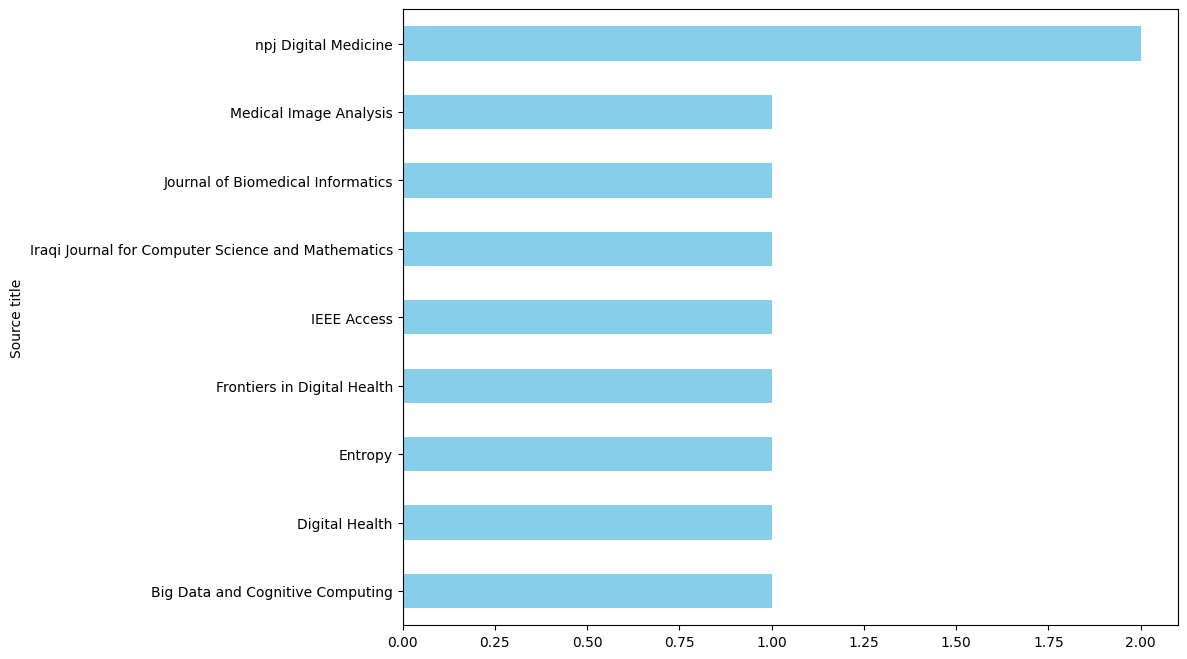

In [ ]:
grouped = df.groupby('Source title')['Title'].count()
top_sources = grouped.sort_values(ascending=False).head(20)  # Tomar las 20 fuentes con más artículos

plt.figure(figsize=(10, 8))  # Ajusta tamaño
top_sources.sort_values().plot(kind='barh', color='skyblue')  # Gráfico horizontal ordenado

plt.show()


**LIMPIAR LOS TITULOS DE LOS ARTICULOS EN EL DATAFRAME**

In [ ]:
import string
from nltk.corpus import stopwords

# Definir la función de limpieza
def clean_text(text):
    if isinstance(text, str):  # Verificar si el texto es una cadena
        text = text.lower()  # Convertir a minúsculas
        text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar signos de puntuación
        words = text.split()  # Tokenizar manualmente
        words = [word for word in words if word not in stopwords.words('english')]  # Eliminar stopwords
        return ' '.join(words)
    return ''

# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)


**25 PALABRAS MAS FRECUENTES EN LOS TITULOS DE LOS ARTICULOS**

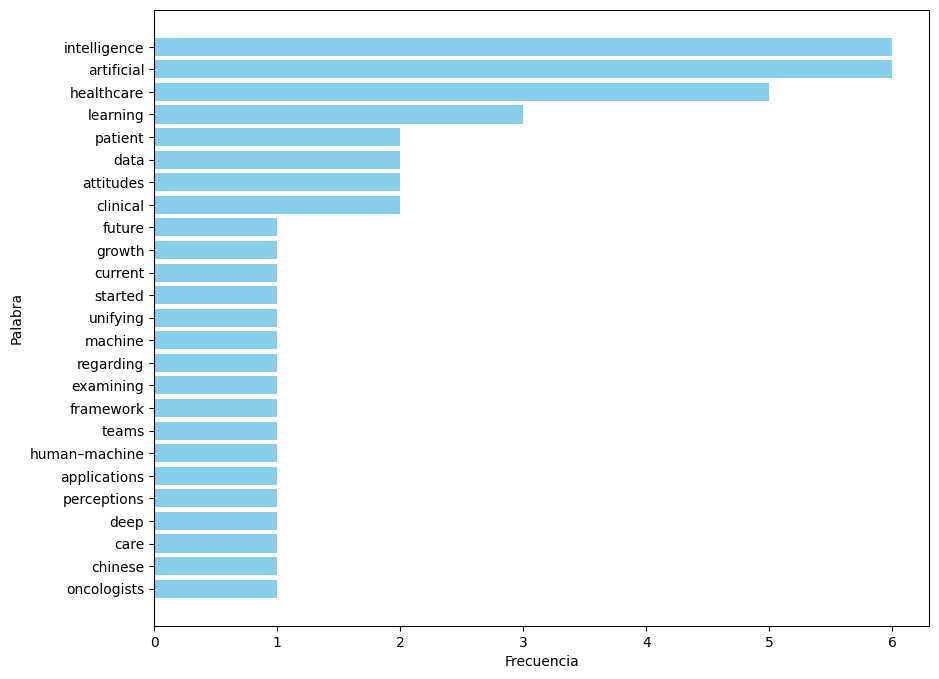

In [ ]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

# Contar la frecuencia de cada palabra en los títulos
word_counts_title = Counter(text.split())

# Convertir el conteo de palabras en un DataFrame
word_df_title = pd.DataFrame(word_counts_title.items(), columns=['Word', 'Frequency'])

# Ordenar el DataFrame por frecuencia de manera ascendente y tomar las 25 palabras más frecuentes
top_words_title = word_df_title.sort_values(by='Frequency', ascending=False).head(25)

# Generar el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(top_words_title['Word'], top_words_title['Frequency'], color='skyblue')  # Usamos 'barh' para un gráfico horizontal
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las palabras más frecuentes arriba
plt.show()


**NUMERO DE ARTICULOS POR FUENTE**

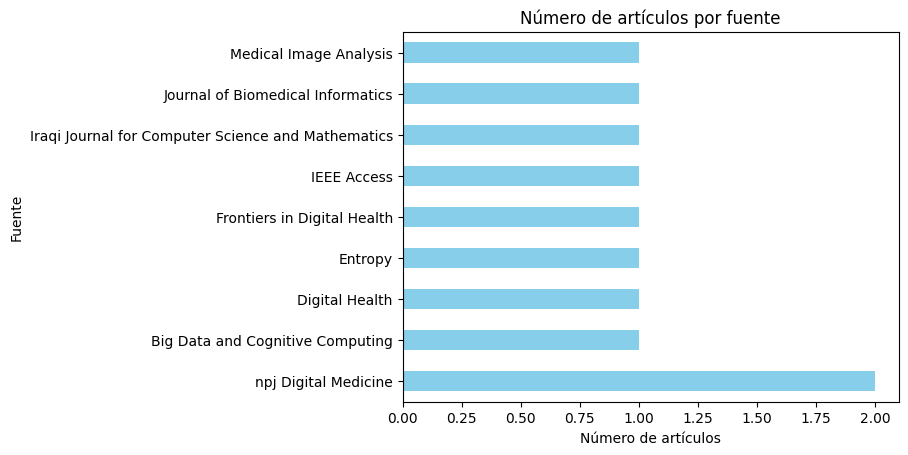

In [ ]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(25)
top_sources.plot(kind='barh', color='skyblue')  # Cambio a barh para gráfico horizontal
plt.title('Número de artículos por fuente')
plt.xlabel('Número de artículos')
plt.ylabel('Fuente')
plt.show()


**LIMPIAR TEXTO DE CARACTERES NO DESEADOS**

In [ ]:
def clean_text(text):
    if not isinstance(text, str):  # Manejo de valores nulos o no str
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Elimina puntuación
    text = ''.join([char for char in text if not char.isdigit()])  # Elimina números
    return ' '.join([word for word in text.split() if word not in stop_words]).strip()


# Analizar Titulos

In [ ]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].fillna('').apply(clean_text)  # Manejo de NaN

# Dividir los títulos en palabras y contarlas con Counter de forma más eficiente
word_counts = Counter(df['clean_title'].str.split().explode())

# Crear un DataFrame con las palabras y su frecuencia
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar por frecuencia de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de ranking sin saltos
word_df['Rank'] = word_df['Frequency'].rank(method='min', ascending=False).astype(int)

# Mostrar el top 20
word_df.head(50)


Word  Frequency  Rank
0       intelligence          6     1
1         artificial          6     1
2         healthcare          5     3
3           learning          3     4
4            patient          2     5
5               data          2     5
6          attitudes          2     5
7           clinical          2     5
8             future          1     9
9             growth          1     9
10           current          1     9
11           started          1     9
12          unifying          1     9
13           machine          1     9
14         regarding          1     9
15         examining          1     9
16         framework          1     9
17             teams          1     9
18     human–machine          1     9
19      applications          1     9
20       perceptions          1     9
21              deep          1     9
22              care          1     9
23           chinese          1     9
24       oncologists          1     9
25           towards          1     9
26    crosssectional          1     9
27            survey          1     9
28      longdistance          1     9
29  disorderdisorder          1     9
30          relation          1     9
31        extraction          1     9
32      bootstrapped          1     9
33         intrinsic          1     9
34       influencing          1     9
35         providing          1     9
36         providers          1     9
37          symbolic          1     9
38         reasoning          1     9
39            spinal          1     9
40           medical          1     9
41            report          1     9
42        generation          1     9
43          economic          1     9
44             value          1     9
45            impact          1     9
46           scoping          1     9
47        literature          1     9
48            review          1     9
49     apprehensions          1     9

**ANALIZA Y LIMPIA LOS TITULOS**

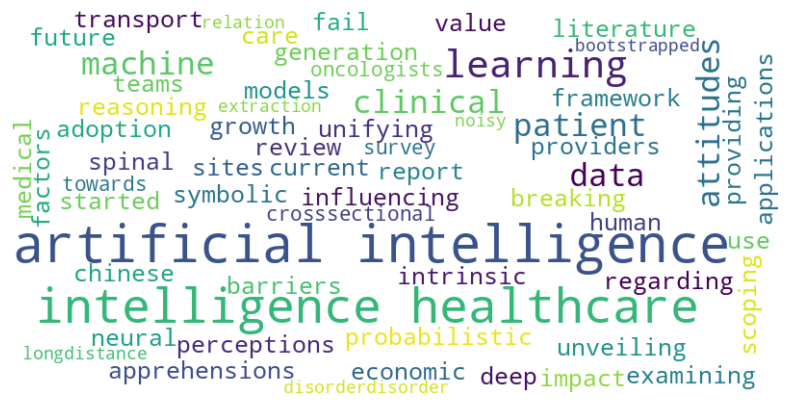

In [ ]:
# Aplicar la limpieza de texto a los títulos (manejo de NaN)
df['clean_title'] = df['Title'].fillna('').apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))  # Tamaño optimizado
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.show()


**25 PALABRAS MAS FRECUENTES EN LOS TITULOS**

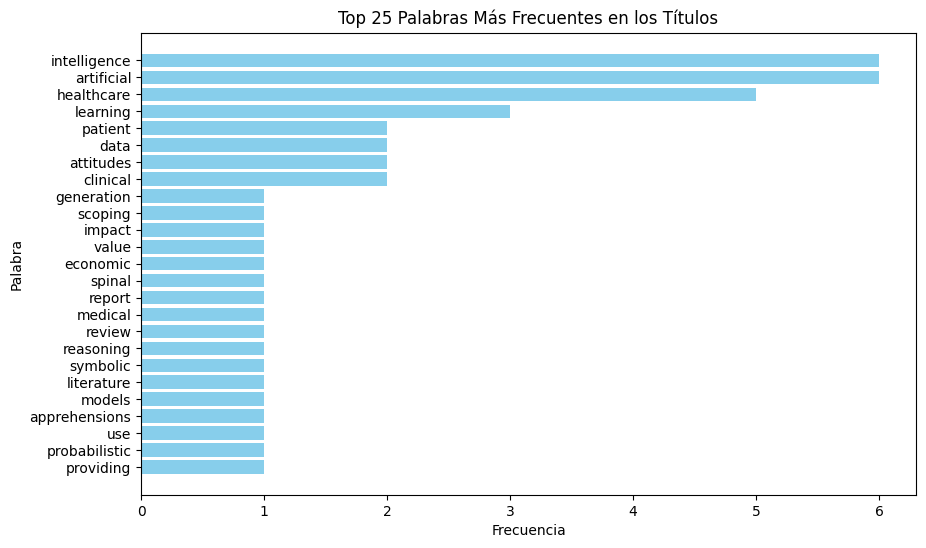

In [ ]:
# Ordenar el DataFrame por frecuencia en orden descendente y tomar las 25 palabras más frecuentes
top_words = word_df.sort_values(by='Frequency', ascending=False).head(25)

# Generar el gráfico de barras horizontal
plt.figure(figsize=(10, 6))  # Ajustar tamaño para mejor visualización
plt.barh(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top 25 Palabras Más Frecuentes en los Títulos')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar las palabras más frecuentes arriba

# Mostrar el gráfico
plt.show()


**ANALIZAR EL ABSTRACT**

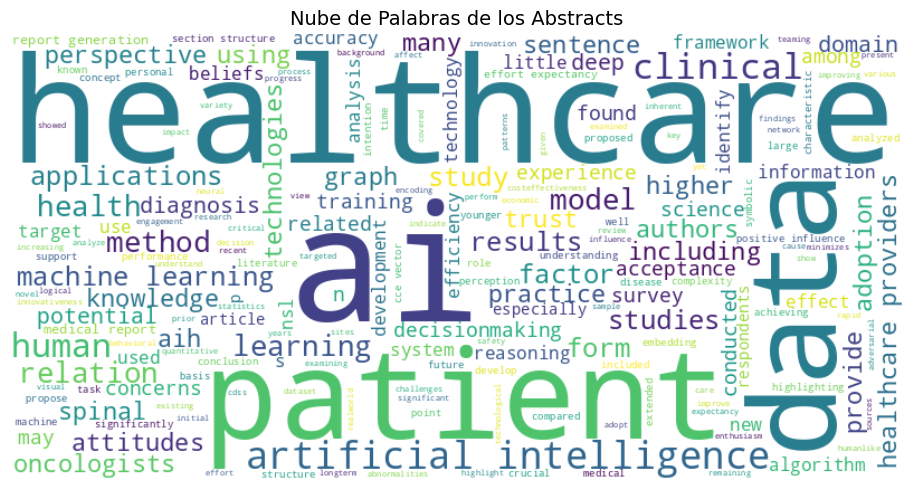

In [ ]:
# Aplicar la limpieza de texto a los abstracts, manejando valores nulos
df['clean_abstract'] = df['Abstract'].fillna('').apply(clean_text)  # Evita errores con NaN

# Concatenar todos los abstracts limpios en un solo texto
text = ' '.join(df['clean_abstract'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Nube de Palabras de los Abstracts', fontsize=14)  # Agregar título
plt.tight_layout()  # Ajustar diseño para evitar recortes
plt.show()


**25 PALABRAS MAS FRECUENTES DE LOS ABSTRACTS**

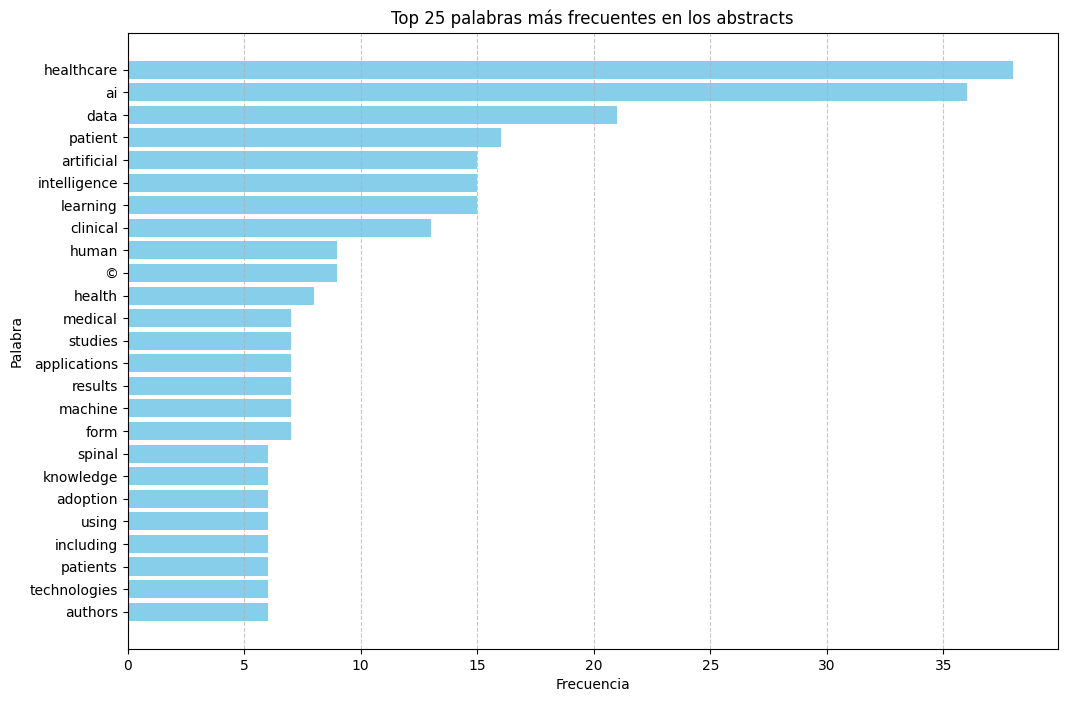

In [ ]:
# Aplicar la limpieza de texto a los abstracts
df['clean_abstract'] = df['Abstract'].dropna().apply(clean_text)  # Evitar errores con valores nulos

# Concatenar todos los abstracts limpios en un solo texto
text = ' '.join(df['clean_abstract'])

# Contar la frecuencia de cada palabra en los abstracts
word_counts_abstract = Counter(text.split())

# Convertir el conteo de palabras en un DataFrame
word_df_abstract = pd.DataFrame(word_counts_abstract.items(), columns=['Word', 'Frequency'])

# Ordenar el DataFrame por frecuencia de manera descendente y tomar las 25 palabras más frecuentes
top_words_abstract = word_df_abstract.nlargest(25, 'Frequency')

# Generar el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(top_words_abstract['Word'], top_words_abstract['Frequency'], color='skyblue')  # Gráfico horizontal
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top 25 palabras más frecuentes en los abstracts')
plt.gca().invert_yaxis()  # Invertir eje y para mostrar palabras más frecuentes arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadir líneas de referencia

plt.show()


**ARTICULOS QUE CONTIENEN MAS PALABRAS CLAVE**

In [ ]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].dropna().apply(lambda title: word_counts.update(clean_text(title).split()))  # Manejo de valores nulos y tokenización correcta

# Determinar un número de palabras clave a considerar (e.g., top 15)
num_keywords = 15
keywords = [word for word, _ in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title).split()  # Asegurar que se maneje como lista de palabras
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].dropna().apply(count_keywords)  # Manejo de valores nulos

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 15 artículos con más palabras clave
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xlabel('Cantidad de palabras clave')
plt.ylabel('Artículo')
plt.title('Top artículos con mayor cantidad de palabras clave')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar los artículos con más palabras clave arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Líneas de referencia en el eje x
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama

plt.show()


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**ANALIZAR ABSTRACTS

In [ ]:
import spacy
import pandas as pd
from collections import Counter

# Cargar modelo de lenguaje en inglés
nlp = spacy.load("en_core_web_sm")

# Seleccionar los 100 abstracts con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(100)['Abstract']

# Función mejorada para resumir un abstract
def summarize_abstract(abstract):
    doc = nlp(abstract)
    sentences = [sent.text for sent in doc.sents]  # Tokenizar en oraciones

    # Contar frecuencia de palabras (sin stopwords)
    words = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    word_freq = Counter(words)

    # Asignar puntuación a cada oración
    scores = {sent: sum(word_freq[word.text.lower()] for word in nlp(sent) if word.text.lower() in word_freq)
              for sent in sentences}

    # Seleccionar las 3 frases más importantes
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]

    return " ".join(summary_sentences)

# Aplicar la función a cada abstract
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar los 100 resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")

# Guardar en un archivo CSV
top_abstracts_summary.to_csv("resumenes.csv", index=False)


Resumen 1:
In this paper, we propose the neural-symbolic learning (NSL) framework that performs human-like learning by unifying deep neural learning and symbolic logical reasoning for the spinal medical report generation. Automated medical report generation in spine radiology, i.e., given spinal medical images and directly create radiologist-level diagnosis reports to support clinical decision making, is a novel yet fundamental study in the domain of artificial intelligence in healthcare. Concretely, we design an adversarial graph network that interpolates a symbolic graph reasoning module into a generative adversarial network through embedding prior domain knowledge, achieving semantic segmentation of spinal structures with high complexity and variability.

Resumen 2:
The results of this study form the basis for a theoretical framework for understanding patient orientation to applications of AI in healthcare, highlighting a number of specific social, health, and technological experien

**RESUMIR ABSTRACTS**

In [ ]:
import pandas as pd
import re
from collections import Counter

# Función para dividir texto en oraciones
def split_sentences(text):
    return re.split(r'(?<=[.!?]) +', text)

# Función para limpiar y tokenizar texto
def clean_text(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    return words

# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los 100 abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(100)

# Función para resumir un abstract
def summarize_abstract(abstract):
    if pd.isna(abstract) or not isinstance(abstract, str):
        return "Resumen no disponible."

    sentences = split_sentences(abstract)
    if len(sentences) <= 2:
        return abstract  # Si es corto, devolver completo

    word_freq = Counter(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in clean_text(sentence)) for sentence in sentences}

    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]  # Tomar las 2 oraciones más relevantes
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")


Title: Unifying neural learning and symbolic reasoning for spinal medical report generation
Summary: When employed in a real-world clinical dataset, a series of empirical studies demonstrate its capacity on spinal medical report generation and show that our algorithm remarkably exceeds existing methods in the detection of spinal structures. Automated medical report generation in spine radiology, i.e., given spinal medical images and directly create radiologist-level diagnosis reports to support clinical decision making, is a novel yet fundamental study in the domain of artificial intelligence in healthcare.

Title: The Economic Value and Clinical Impact of Artificial Intelligence in Healthcare: A Scoping Literature Review
Summary: These studies covered a wide variety of clinical use cases and healthcare domains, including disease diagnosis (n=13, 41.9%), risk analysis (n=6, 19.4%), screening or patient triage (n=6, 19.4%), treatment delivery (n=5, 16.1%), and patient engagement or foll

In [ ]:
print(df.columns)  # Para ver los nombres exactos de las columnas
print(df.head())   # Para ver una muestra de los datos


Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Link', 'Abstract', 'Author Keywords', 'Index Keywords',
       'References', 'Publisher', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'clean_title', 'clean_abstract',
       'keyword_count'],
      dtype='object')
                                             Authors  \
0      Han Z.; Wei B.; Xi X.; Chen B.; Yin Y.; Li S.   
1                      Jiao W.; Zhang X.; D'Souza F.   
2  Richardson J.P.; Smith C.; Curtis S.; Watson S...   
3                Lasko T.A.; Strobl E.V.; Stead W.W.   
4  Hameed B.M.Z.; Naik N.; Ibrahim S.; Tatkar N.S...   

                                   Author full names  \
0  Han, Zhongyi (57194624171); Wei, Benzheng (259...   
1  Jiao, Weiqi (58339107900); Zhang, Xuan (587020...   
2  Richardson, Jordan P. (57216132347); Smith, Ca...   
3  Lasko, Thomas A. (6507484673); Strobl, Eric V....   
4  Hameed, BM Zeeshan (57213811630); Naik, Nith